In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
path = "./DatasetV03/1. No DR signs/1.jpg"

Original image

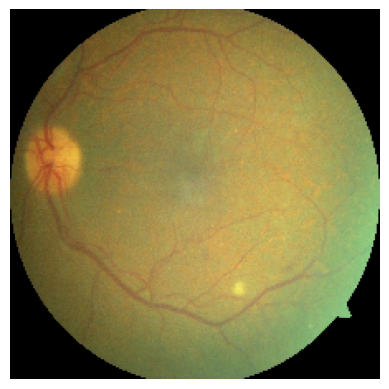

In [23]:
image_size = (224, 224)
image = cv2.imread(path)
image = cv2.resize(image, image_size)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image)

In [24]:
def blur_image_median(image, kernel_size=5):
    blurred_image = cv2.medianBlur(image, kernel_size)
    return blurred_image

def detect_edges_sobel(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel edge detection
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine horizontal and vertical edge images
    edge_image = cv2.magnitude(sobelx, sobely)
    
    _, binary_edge_image = cv2.threshold(edge_image, 20, 255, cv2.THRESH_BINARY)
    
    return binary_edge_image

In [25]:
blurred = blur_image_median(image)
image = detect_edges_sobel(blurred)

Rotate

In [26]:
def rotate (image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

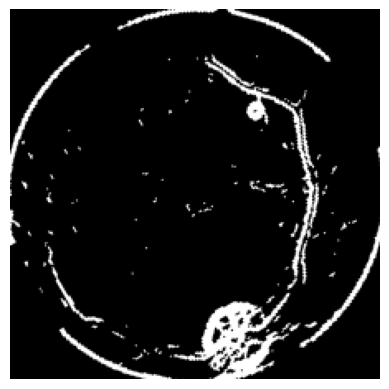

In [27]:
rotated_image = rotate(image, 120)
plt.axis("off")
plt.imshow(rotated_image, cmap = 'gray')

Flip

In [28]:
def flip (image):
    flipped_horizontal = cv2.flip(image, 1)
    return flipped_horizontal

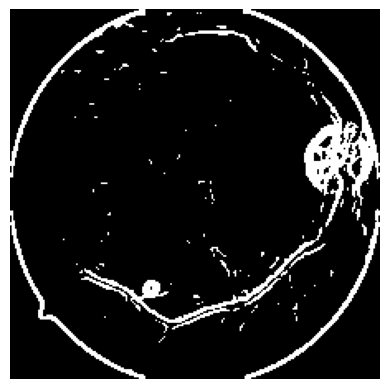

In [29]:
flipped_image = flip(image)
plt.axis("off")
plt.imshow(flipped_image, cmap = 'gray')

Shift

In [30]:
def shift (image, shift_x, shift_y):
    rows, cols = image.shape[:2]
    shift_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]]) # Shift x,y
    shifted_image = cv2.warpAffine(image, shift_matrix, (cols, rows))
    return shifted_image

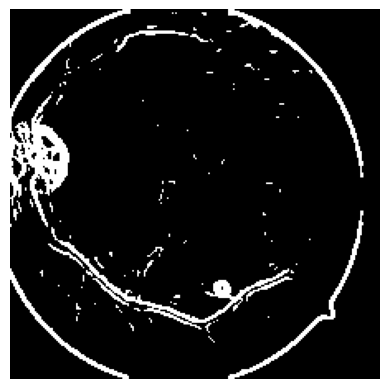

In [31]:
shifted_image = shift(image, -10, 0)
plt.axis("off")
plt.imshow(shifted_image, cmap = 'gray')